In [1]:
# import re
from textblob import TextBlob
from twython import Twython
# import nltk
import pandas as pd

In [2]:
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [3]:
def get_tweet(q):
    app_key = 'bdKaYkyCcSmf9f6Wfqj8VvIuR'
    app_secret = '1S1WMaZJxdIFyiniKjDeLFCBDRPP72bx2HCxI2cwMTx0Y7bYOy'
    oauth_token = '786603866498269184-DSnfKXCZhYNRUjboLDwHWaZ7InaFslf'
    oauth_token_secret = 'QDRQK2huoL8hpo3MvaqrNdrGtvWWxCd6sCCI8B0X95v8y'
    try:
        t = Twython(app_key=app_key, app_secret=app_secret, oauth_token=oauth_token, oauth_token_secret=oauth_token_secret)
        search =t.search(q=q,count=200)
        fetched_tweets = search['statuses']
        text=[]
        for i in fetched_tweets:
            text.append(i.get('text'))
        sentiment=[]
        for tweet in text:
            sentiment.append(get_tweet_sentiment(tweet))

    except:
        print("error")
    ptweets = [tweet for tweet in sentiment if tweet == 'positive']
    ntweets = [tweet for tweet in sentiment if tweet == 'negative']
    positive_tweet=int(100*len(ptweets)/len(sentiment))
    negative_tweets=int(100*len(ntweets)/len(sentiment))
    neutral_tweets=int(100*(len(sentiment) - len(ntweets) - len(ptweets))/len(sentiment))
    return text,sentiment,positive_tweet,negative_tweets,neutral_tweets


In [4]:
text_cand_1,sentiment_cand_1,x1,y1,z1=get_tweet('JSP')
text_cand_2,sentiment_cand_2,x2,wy2,z2=get_tweet('TDP')
text_cand_3,sentiment_cand_3,x3,y3,z3=get_tweet('YSRCP')

In [5]:
df_cand_1=pd.DataFrame()
df_cand_1['text']=text_cand_1
df_cand_1['sentiment']=sentiment_cand_1
%matplotlib inline

df_cand_1

,text,sentiment
0,@denzelent @bulmasuzuya Jsp jvais te dire et t...,neutral
1,RT @clempcqr: jsp si jdois lui envoyer un mess...,neutral
2,vous avez 2 de tension le matin certain bande ...,positive
3,RT @adp_au: INFOBAR xvをお使いの皆様、\nお待たせしました。\nお待た...,neutral
4,RT @ShayarImran: #BHU के संस्थापक महामना मदन म...,neutral
...,...,...
95,Sports Car https://t.co/jvxCJBELYm https://t.c...,neutral
96,Amazing TOP 5 Creations You Can Do By Yourself...,positive
97,RT @clempcqr: jsp si jdois lui envoyer un mess...,neutral
98,RT @jellpdesu: https://t.co/5125g13ol1 \n멜론이벤트...,neutral


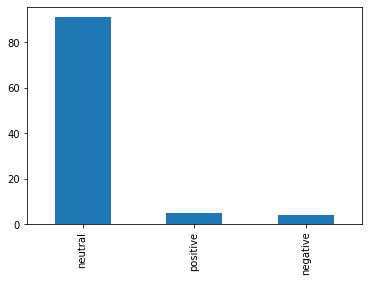

In [6]:
df_cand_1['sentiment'].value_counts().plot(kind='bar')


In [7]:
df_cand_2=pd.DataFrame()
df_cand_2['text']=text_cand_2
df_cand_2['sentiment']=sentiment_cand_2

df_cand_2

,text,sentiment
0,RT @vinayk1111: జైలు కి వెళ్లొచ్చు అని హింట్ ఇ...,neutral
1,RT @RavanSunkara: vallabaneni Vamshi view abou...,neutral
2,RT @pdinakar: After all the heavy build up bef...,neutral
3,TDP reaches out to BJP with a ‘Hindutva makeov...,neutral
4,"RT @thespacenico: can we all spam aaron with ""...",positive
...,...,...
93,Iba nga pala timezone nitong Netflix nasan na ...,neutral
94,RT @galeezpilla: Tell me when u find it 😉\n\n#...,neutral
95,RT @prasana_kumar: 🤣🤣🤣@TagoreMallineni @turaga...,neutral
96,RT @prasana_kumar: 🤣🤣🤣@TagoreMallineni @turaga...,neutral


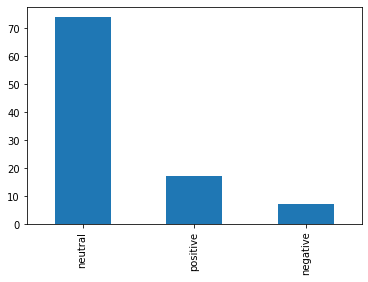

In [8]:
df_cand_2['sentiment'].value_counts().plot(kind='bar')

In [9]:
df_cand_3=pd.DataFrame()
df_cand_3['text']=text_cand_3
df_cand_3['sentiment']=sentiment_cand_3

df_cand_3

,text,sentiment
0,RT @YSRCParty: నాలుగేళ్లు అధికారం అనుభవించి చి...,neutral
1,RT @thota_J: Sakshi Investments 😇\n\n2017 lo G...,neutral
2,RT @anigalla: గాంధీ పుట్టిన దేశం \nరంగులు వేసే...,neutral
3,"RT @JSPShatagniTeam: నేడు వైసీపీ ""కరప్షన్ మార్...",neutral
4,"RT @JSPShatagniTeam: నేడు వైసీపీ ""కరప్షన్ మార్...",neutral
...,...,...
95,RT @TrendPSPK: ఇంకెన్ని దారుణాలు చూడాలో..!!\n\...,neutral
96,RT @TrendPSPK: ఇంకెన్ని దారుణాలు చూడాలో..!!\n\...,neutral
97,RT @TrendPSPK: ఇంకెన్ని దారుణాలు చూడాలో..!!\n\...,neutral
98,RT @ChiruFollower: Istam unna party ki meru su...,neutral


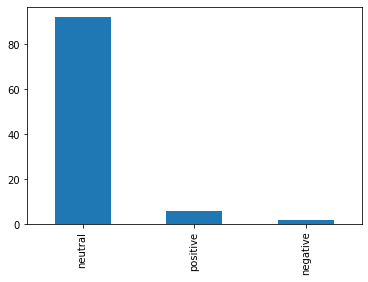

In [10]:
df_cand_3['sentiment'].value_counts().plot(kind='bar')